<a href="https://colab.research.google.com/github/shab-sa/cs_internship/blob/main/Step9/Fraud%20Detection%20copy%202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import zipfile
file=zipfile.ZipFile('emails.csv.zip')
file.extractall()

In [ ]:
! pip install -q kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"shabnamsalman","key":"04618084ecb2066349ff70a4e1156228"}'}

In [ ]:
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

In [ ]:
 ! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d wcukierski/enron-email-dataset

100% 358M/358M [00:11<00:00, 43.7MB/s]
100% 358M/358M [00:11<00:00, 32.0MB/s]


In [ ]:
! unzip enron-email-dataset.zip

Archive:  enron-email-dataset.zip
  inflating: emails.csv              


In [ ]:
import pandas  as pd
df=pd.read_csv('emails.csv')

In [ ]:
df.head()

,file,message
0,allen-p/_sent_mail/1.,Message-ID: <18782981.1075855378110.JavaMail.e...
1,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...
2,allen-p/_sent_mail/100.,Message-ID: <24216240.1075855687451.JavaMail.e...
3,allen-p/_sent_mail/1000.,Message-ID: <13505866.1075863688222.JavaMail.e...
4,allen-p/_sent_mail/1001.,Message-ID: <30922949.1075863688243.JavaMail.e...


In [ ]:
df["message"][0].split("\n")

['Message-ID: <18782981.1075855378110.JavaMail.evans@thyme>',
 'Date: Mon, 14 May 2001 16:39:00 -0700 (PDT)',
 'From: phillip.allen@enron.com',
 'To: tim.belden@enron.com',
 'Subject: ',
 'Mime-Version: 1.0',
 'Content-Type: text/plain; charset=us-ascii',
 'Content-Transfer-Encoding: 7bit',
 'X-From: Phillip K Allen',
 'X-To: Tim Belden <Tim Belden/Enron@EnronXGate>',
 'X-cc: ',
 'X-bcc: ',
 "X-Folder: \\Phillip_Allen_Jan2002_1\\Allen, Phillip K.\\'Sent Mail",
 'X-Origin: Allen-P',
 'X-FileName: pallen (Non-Privileged).pst',
 '',
 'Here is our forecast',
 '',
 ' ']

In [ ]:
import re
def create_dataframe(series):
    data = []
    #for line in series.split('\n'):
        #data.append(dict(re.findall(r"(Message-ID|Date|From|To|Subject|Mime-Version|Content-Type|Content-Transfer-Encoding|X-From|X-To|X-cc|X-bcc|X-Folder|X-Origin|X-FileName)\s*:\s*([^\s]+)", line)))
        #data1={k:v for element in data for k,v in element.items()}
#    data1={}
    d=' '.join(series.split('\n')[15:]).strip()
    return d

In [ ]:
df['text'] = df['message'].map(create_dataframe)
#df_splited = pd.DataFrame.from_records(df1).fillna("")

In [ ]:
print(df.shape)

(517401, 3)


In [ ]:
df=df.drop(columns=['file','message'])

In [ ]:
df=df.drop_duplicates()

In [ ]:
df.shape

(313411, 1)

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import numpy as np
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
stop = set(stopwords.words('english'))
stop.update(('from','to','cc','http', 're', 'www', 'com','subject','sent','email','u','ok','thanks','please','ect','dt','pm'))
#tag=0
#emo=0
def tokenizer(text):
    #global tag,emo
    #text = re.sub('<[^>]*>', '', text)
    #if re.findall('<[^>]*>', text):
        #tag += 1
    #emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)', text.lower())
    #if emoticons:
        #emo += 1
    text = re.sub('[\d]', '', text)
    text = re.sub('[\W]+', ' ', text.lower()) #+ ' '.join(emoticons).replace('-', '')
    tokenized = [w for w in text.split() if w not in stop]
    #tokenized = [WordNetLemmatizer().lemmatize(w) for w in tokenized]
    #tokenized = [PorterStemmer().stem(w) for w in tokenized]
    t=' '.join(tokenized)
    return t

In [ ]:
df['text']=df['text'].map(tokenizer)

In [ ]:
#from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

#count = CountVectorizer()
tfidf = TfidfVectorizer()#use_idf=True, norm='l2', smooth_idf=True)
#np.set_printoptions(precision=2)
x_train = tfidf.fit_transform(df['text'])
print(x_train)

  (0, 197071)	1.0
  (1, 453726)	0.04799570810174158
  (1, 323652)	0.06729963748651249
  (1, 428343)	0.12076097914614489
  (1, 195897)	0.12491215659443032
  (1, 257094)	0.13589686424547417
  (1, 85610)	0.13719955549376175
  (1, 424130)	0.26416131572333246
  (1, 393590)	0.1265359118810994
  (1, 213425)	0.11631517565853448
  (1, 364324)	0.09419046268167483
  (1, 63310)	0.10181508288464111
  (1, 212872)	0.061004419485605796
  (1, 438975)	0.11609614687416626
  (1, 197388)	0.09742968095575189
  (1, 149133)	0.06870843441148314
  (1, 443820)	0.08812879053938948
  (1, 403357)	0.10146279788696631
  (1, 225323)	0.08569699470128386
  (1, 77816)	0.07733490988121451
  (1, 313792)	0.07397716483049789
  (1, 463013)	0.08794715881091321
  (1, 487113)	0.09922504258090017
  (1, 384166)	0.12894148829836272
  (1, 350033)	0.07696183033643429
  :	:
  (313410, 452056)	0.03349152181713406
  (313410, 294263)	0.07366165789880172
  (313410, 389496)	0.09991037242255194
  (313410, 123726)	0.024601589121987257
  (313

In [ ]:
import numpy as np
from sklearn.decomposition import TruncatedSVD

model = TruncatedSVD(n_components=2, random_state=42)
x_train_r=model.fit_transform(x_train)

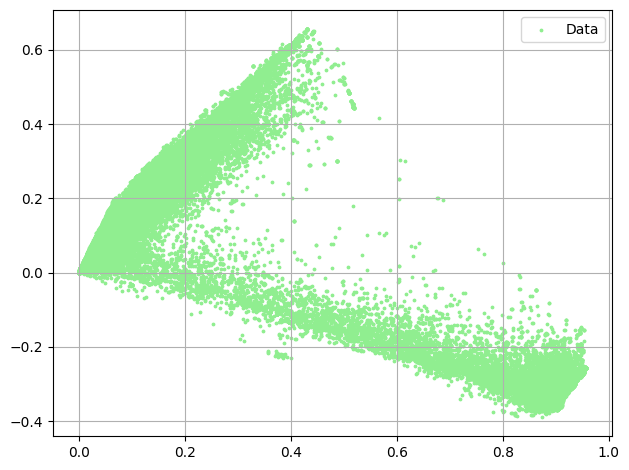

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x_train_r[:, 0], x_train_r[:, 1], s=3, c='lightgreen', label='Data')
plt.legend(scatterpoints=1)
plt.grid()
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans( n_clusters=2, max_iter=100, n_init=1, random_state=42).fit(x_train)
cluster_ids, cluster_sizes = np.unique(kmeans.labels_, return_counts=True)
print(f"Number of elements assigned to cluster {cluster_ids}: {cluster_sizes}")

Number of elements assigned to cluster [0 1]: [ 18040 295371]


In [ ]:
y=KMeans.predict(kmeans, x_train)
kmeans.cluster_centers_.shape

(2, 520863)

In [ ]:
kmeans.cluster_centers_

array([[5.08071206e-05, 5.84502518e-06, 4.81907727e-07, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.89768274e-04, 8.77356825e-05, 6.56016838e-05, ...,
        9.94093581e-08, 2.20852955e-08, 8.76554723e-07]])

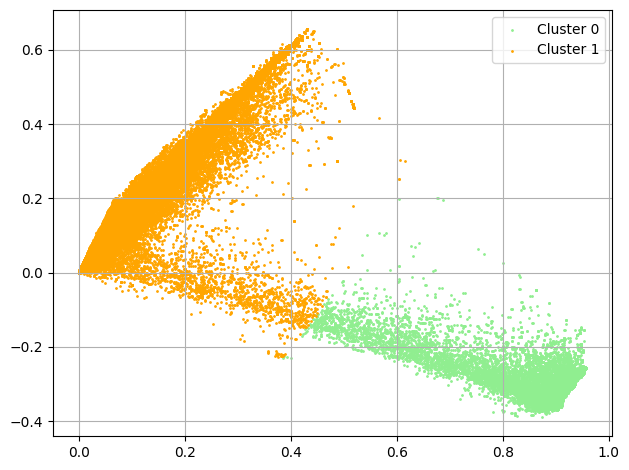

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x_train_r[y == 0, 0], x_train_r[y == 0, 1], s=1, c='lightgreen', label='Cluster '+str(cluster_ids[0]))
plt.scatter(x_train_r[y == 1, 0], x_train_r[y == 1, 1], s=1, c='orange', label='Cluster '+str(cluster_ids[1]))
#plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=250, marker='*', c='yellow', edgecolor='black', label='Centroids')
plt.legend(scatterpoints=1)
plt.grid()
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score
score=silhouette_score(x_train_r, kmeans.labels_, metric='euclidean', sample_size=10000)
print(score)

0.8551120795245877


In [ ]:
features = tfidf.get_feature_names_out()
tfidf_sorting = kmeans.cluster_centers_.argsort()[:,::-1]

In [ ]:
for i in range(2):
    print(f'cluster {cluster_ids[i]}:')
    print(features[tfidf_sorting[i,:20]])

cluster 0:
['cn' 'recipients' 'ou' 'na' 'enron' 'pdavis' 'notesaddr' 'pete' 'davis'
 'ryan' 'slinger' 'non' 'privileged' 'williams' 'john' 'bcc' 'solberg'
 'meyers' 'schedules' 'pst']
cluster 1:
['enron' 'hou' 'message' 'filename' 'would' 'mail' 'know' 'origin'
 'original' 'nsf' 'corp' 'mark' 'attached' 'time' 'let' 'energy' 'call'
 'get' 'notes' 'gas']
